# Laporan Proyek Machine Learning - Ahmad Kholish Fauzan Shobiry

## Domain Proyek

Penyakit jantung merupakan penyebab utama kematian di dunia. Menurut data World Health Organization (WHO), sekitar 17,9 juta orang meninggal setiap tahun karena penyakit kardiovaskular, yang mewakili 31% dari seluruh kematian global. Identifikasi dini sangat penting dalam menurunkan angka kematian dan memberikan penanganan yang tepat bagi pasien.

Saat ini, proses diagnosis penyakit jantung sering kali melibatkan banyak uji medis yang kompleks dan memakan waktu. Dengan bantuan Machine Learning, kita dapat membangun sistem prediksi berbasis data medis untuk mendeteksi kemungkinan seseorang menderita penyakit jantung secara lebih cepat dan efisien.

Mengapa masalah ini penting diselesaikan?

1. Deteksi dini = meningkatkan peluang kesembuhan
2. Membantu dokter/tenaga medis sebagai sistem pendukung keputusan
3. Menghemat waktu & biaya diagnosis manual

Referensi:
[Cardiovascular Diseases (WHO)](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))




## Business Understanding
Pada bagian ini dijelaskan proses klarifikasi masalah untuk memprediksi kemungkinan penyakit jantung pada pasien berdasarkan data medis numerik. Tujuannya adalah untuk membantu tenaga medis atau sistem pendukung keputusan dalam mengidentifikasi pasien yang berisiko tinggi terhadap penyakit jantung.

### Problem Statements
1. Pernyataan Masalah 1
<br>Bagaimana cara mengidentifikasi pasien yang berpotensi menderita penyakit jantung berdasarkan data medis numerik?

2. Pernyataan Masalah 2
<br>Algoritma machine learning mana yang paling optimal untuk melakukan prediksi penyakit jantung?

3. Pernyataan Masalah 3
<br>Apa saja fitur (variabel) yang paling berpengaruh terhadap prediksi penyakit jantung?

### Goals
1. Jawaban Pernyataan Masalah 1
<br>Membangun model machine learning klasifikasi biner yang mampu memprediksi apakah seorang pasien menderita penyakit jantung atau tidak, berdasarkan input data medis numerik.

2. Jawaban Pernyataan Masalah 2
<br>Mengevaluasi dan membandingkan beberapa algoritma machine learning seperti Logistic Regression, Random Forest, dan SVM untuk menentukan model yang memberikan performa terbaik berdasarkan metrik evaluasi seperti akurasi, precision, recall, dan F1-score.

3. Jawaban Pernyataan Masalah 3
<br>Melakukan analisis feature importance dari model untuk mengidentifikasi fitur-fitur medis yang paling signifikan terhadap diagnosis penyakit jantung.

### Solution Statements
1. Menerapkan beberapa algoritma machine learning (misalnya: Logistic Regression, KNN, dan Random Forest) untuk membuat model prediksi, kemudian memilih model dengan kinerja terbaik berdasarkan metrik evaluasi.

2. Melakukan hyperparameter tuning pada model terpilih untuk meningkatkan performa prediksi menggunakan teknik seperti Grid Search atau Random Search.


## Data Understanding

Untuk proyek ini digunakan dataset dari Kaggle Heart Failure Prediction. Dataset ini berisi informasi medis dari pasien, yang mencakup berbagai fitur klinis seperti usia, jenis kelamin, tekanan darah, kolesterol, dan lainnya.

Sumber data:
<br>[Heart Failure Prediction Dataset - Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

Fitur-fitur dalam dataset:
1. Age: usia pasien
2. Sex: jenis kelamin (0 = perempuan, 1 = laki-laki)
3. ChestPainType: jenis nyeri dada
4. RestingBP: tekanan darah saat istirahat
5. Cholesterol: kadar kolesterol dalam darah
6. FastingBS: gula darah puasa (>120 mg/dl: 1, lainnya: 0)
7. RestingECG: hasil pemeriksaan EKG saat istirahat
8. MaxHR: detak jantung maksimum
9. ExerciseAngina: nyeri dada saat olahraga (Y/N)
10. Oldpeak: depresiasi ST
11. ST_Slope: kemiringan segmen ST
12. HeartDisease: target/label (0 = tidak sakit jantung, 1 = sakit jantung)

## Data Preparation
Pada bagian ini dilakukan serangkaian proses persiapan data sebelum membangun model machine learning. Teknik-teknik data preparation dilakukan secara berurutan sebagai berikut:

1. Load Dataset
<br>Dataset dimuat ke dalam environment menggunakan pustaka pandas untuk dilakukan analisis lebih lanjut.

2. Cek Missing Value
<br>Dilakukan pemeriksaan terhadap nilai-nilai yang hilang (missing values) dalam dataset untuk memastikan kualitas data yang akan digunakan. Hasilnya menunjukkan tidak terdapat nilai yang hilang.

3. Encoding Data Kategorikal
<br>Fitur kategorikal diubah menjadi bentuk numerik menggunakan teknik encoding. Hal ini penting agar semua data bersifat numerik, sehingga dapat digunakan untuk analisis korelasi dan perhitungan feature importance pada model machine learning.

4. Split Data
<br>Dataset dibagi menjadi dua bagian, yaitu data latih (X_train, y_train) dan data uji (X_test, y_test). Pembagian ini bertujuan untuk melatih model dan mengujinya pada data yang belum pernah dilihat sebelumnya guna mengevaluasi performa model.

5. Standarisasi Fitur
<br>Fitur numerik distandarisasi menggunakan StandardScaler. Standarisasi ini penting dilakukan terutama untuk algoritma seperti Logistic Regression, Random Forest, dan K-Nearest Neighbors (KNN) yang sensitif terhadap skala fitur.

6. Visualisasi Korelasi Fitur (Heatmap)
Heatmap korelasi antar fitur dibuat untuk memahami hubungan antar variabel, mengidentifikasi potensi multikolinearitas, dan sebagai referensi awal untuk menentukan fitur-fitur yang relevan dalam membangun model prediksi.

In [ ]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Untuk modeling & evaluasi
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-failure-prediction


In [ ]:
# Load dataset dari path lokal
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

# Tampilkan beberapa data awal
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Mengecek apakah ada data kosong, tipe data tiap kolom, dan ringkasan statistik numerik.
# Ukuran dataset
print(f'Jumlah baris dan kolom: {df.shape}')
# Cek missing value
print(df.isnull().sum())
# Info tipe data
df.info()
# Statistik ringkas
df.describe()

Jumlah baris dan kolom: (918, 12)
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    91

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Insights:**
- Semua kolom memiliki 918 non-null values, artinya tidak ada missing value di dataset ini. Ini sangat bagus karena tidak perlu melakukan imputasi atau menghapus baris/kolom.
- Beberapa kolom bertipe numerik (int64, float64), dan beberapa lainnya bertipe objek (object) meskipun secara logika harusnya numerik atau kategorikal. Contoh kolom yang kemungkinan perlu diubah dari object ke category atau int: Sex, ChestPainType, RestingECG, ExerciseAngina, dan ST_Slope. Ini penting supaya model machine learning bisa membaca data dengan benar dan kita bisa pakai encoding yang sesuai (Label Encoding / One-Hot Encoding).

**Insights dari Data statistik:**
- Age: Rata-rata usia pasien adalah 53.5 tahun, dengan rentang usia dari 28 hingga 77 tahun.
- RestingBP (tekanan darah istirahat): Ada nilai minimum 0, yang tidak realistis → mungkin data error atau perlu ditinjau ulang.
- Cholesterol: Juga ada nilai 0, yang kemungkinan besar tidak valid → ini bisa dianggap sebagai nilai hilang (missing secara implisit).
- FastingBS (gula darah puasa): Ini berupa biner (0 atau 1), sesuai dengan definisinya.
- MaxHR (denyut jantung maksimum): Nilai maksimum 202, masuk akal.
- Oldpeak: Rata-rata 0.88 dengan rentang dari -2.6 hingga 6.2 → nilai negatif bisa mencurigakan, biasanya tidak ada oldpeak negatif.
- HeartDisease: Ini target label. Nilai rata-rata 0.553, artinya distribusi target cukup seimbang antara positif dan negatif (sekitar 55% memiliki penyakit jantung).

In [ ]:
# Cek jumlah nilai 0 pada kolom RestingBP dan Cholesterol
print("RestingBP - nilai 0:", (df['RestingBP'] == 0).sum())
print("Cholesterol - nilai 0:", (df['Cholesterol'] == 0).sum())

# Ganti nilai 0 dengan NaN agar bisa diisi dengan imputasi
df['RestingBP'].replace(0, np.nan, inplace=True)
df['Cholesterol'].replace(0, np.nan, inplace=True)

# Imputasi dengan median karena distribusi kemungkinan tidak normal
df['RestingBP'].fillna(df['RestingBP'].median(), inplace=True)
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)

# Nilai 0 pada tekanan darah (RestingBP) dan kolesterol (Cholesterol) tidak realistis → saya anggap sebagai missing value implisit dan diisi dengan nilai median.

RestingBP - nilai 0: 1
Cholesterol - nilai 0: 172


<ipython-input-23-c6edee46994d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RestingBP'].replace(0, np.nan, inplace=True)
<ipython-input-23-c6edee46994d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Ubah Data Kategorikal Bertipe object ke Bentuk Numerik
# Cek kolom bertipe object
df.select_dtypes('object').columns

# One-hot encoding dengan drop_first untuk menghindari multikolinearitas
df_encoded = pd.get_dummies(df, drop_first=True)

# Tampilkan dataframe hasil encoding
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True


One-hot encoding digunakan untuk kolom kategorikal agar bisa diproses oleh algoritma ML. drop_first=True mencegah duplikasi informasi (dummy variable trap).

In [ ]:
# Pisahkan fitur dan label
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data dibagi menjadi dua bagian agar kita bisa melatih model dan mengevaluasinya pada data yang tidak pernah dilihat sebelumnya.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Fit transform ke X_train dan transform X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Standarisasi penting terutama untuk model seperti Logistic Regression, Random Forest, KNN—karena sensitif terhadap skala fitur.

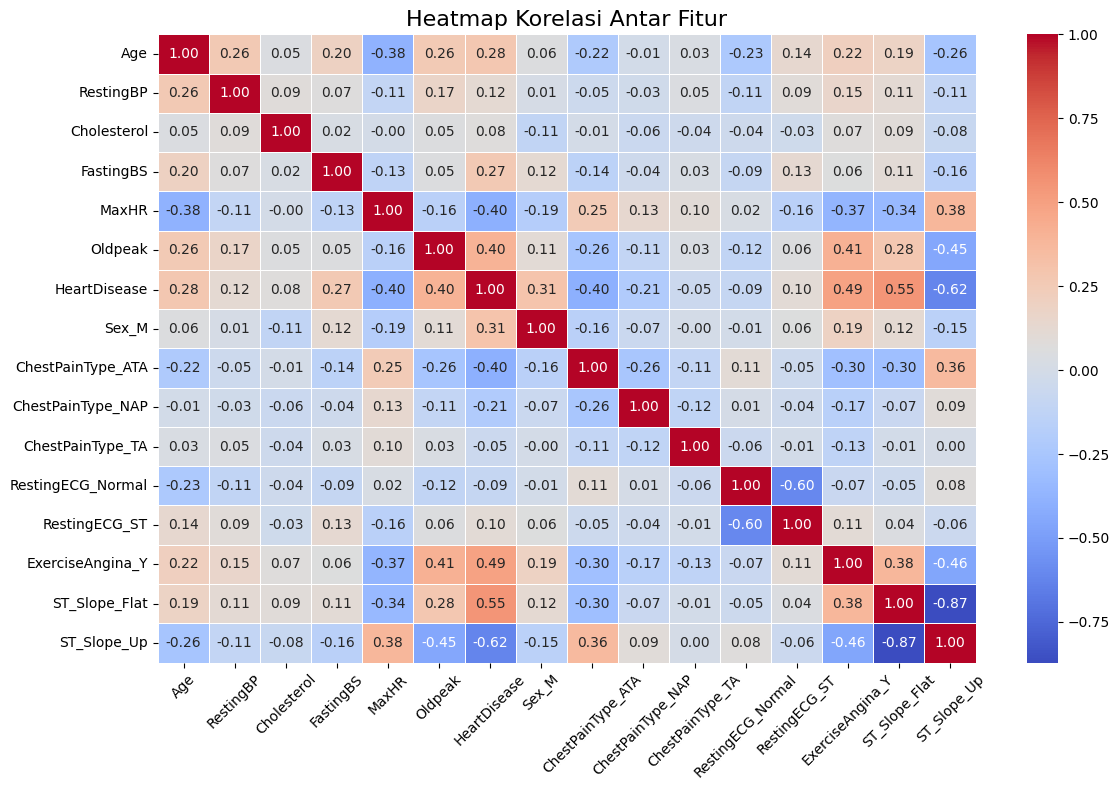

In [ ]:
# Hitung korelasi antar fitur
corr_matrix = df_encoded.corr()

# Ukuran figure
plt.figure(figsize=(12, 8))

# Buat heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Heatmap membantu kita memahami hubungan antar fitur, terutama dengan label HeartDisease.

**Insights dari heatmap:**
1. Korelasi terhadap Target (HeartDisease)
Kolom HeartDisease adalah target/label. Kita ingin tahu fitur mana yang paling berpengaruh terhadapnya (nilai korelasi tertinggi mutlak):
- Korelasi positif dengan HeartDisease:
<br> - Oldpeak (0.40): Semakin tinggi Oldpeak, semakin besar kemungkinan menderita penyakit jantung.
<br> - FastingBS (0.27): Gula darah puasa tinggi cenderung terkait dengan penyakit jantung.
<br> - Age (0.28): Usia lebih tua sedikit meningkatkan risiko.
<br> - Sex_M (0.31): Pria sedikit lebih berisiko dalam dataset ini.

- Korelasi negatif dengan HeartDisease:
<br> - MaxHR (-0.40): Semakin tinggi detak jantung maksimum, semakin rendah kemungkinan terkena penyakit jantung.
<br> - ST_Slope_Up (-0.62): Slope yang menanjak sangat kuat dikaitkan dengan tidak adanya penyakit jantung.
<br> - ExerciseAngina_Y (-0.49): Punya angina saat olahraga berkorelasi negatif — ini tampak aneh dan bisa berarti perlu dicek interpretasi kolom (mungkin 'Y' = tidak ada angina dalam encoding).
<br> - ST_Slope_Flat (0.55): Korelasi positif kuat, menunjukkan flat slope sering terjadi pada pasien dengan penyakit jantung.
<br> Korelasi tertinggi absolut: ST_Slope_Up dan ST_Slope_Flat (dengan arah berlawanan), bisa sangat penting dalam prediksi.

2. Korelasi Antar Fitur (Multikolinearitas)
Beberapa fitur punya korelasi tinggi satu sama lain:
<br> - ST_Slope_Up vs ST_Slope_Flat: -0.87 → Sangat kuat. Bisa pertimbangkan untuk drop salah satunya (jika pakai model linear) atau hati-hati saat interpretasi.
<br> - ExerciseAngina_Y vs ST_Slope_Up: -0.46
<br> - Oldpeak vs ST_Slope_Up: -0.45
<br> Korelasi tinggi antar fitur bisa menyebabkan multikolinearitas → tidak masalah untuk tree-based model, tapi penting jika pakai regresi/logistic regression.

3. Fitur dengan Korelasi Lemah
Fitur-fitur yang memiliki korelasi lemah (mendekati 0) dengan target HeartDisease:
<br> - Cholesterol (0.08)
<br> - RestingBP (0.12)
<br> - RestingECG_ST (0.10)
<br> - ChestPainType_TA (0.11)
<br>Bisa dipertimbangkan untuk dieliminasi atau digabungkan tergantung performa model nanti.

4. Distribusi ChestPainType
Terdapat dummy variable untuk tipe nyeri dada:
<br> - ChestPainType_ATA (-0.26)
<br> - ChestPainType_NAP (-0.21)
<br> - ChestPainType_TA (0.11)
<br>ATA dan NAP memiliki korelasi negatif → bisa jadi jenis nyeri ini lebih umum pada pasien tanpa penyakit jantung.

## Modeling

Pada tahap ini, dilakukan proses pemodelan menggunakan tiga algoritma machine learning untuk memprediksi kemungkinan seseorang menderita penyakit jantung berdasarkan data medis numerik. Pemilihan algoritma dilakukan untuk melihat perbandingan performa antar pendekatan linear, non-linear, dan berbasis jarak.

### Algoritma yang Digunakan
1. Logistic Regression
<br>Logistic Regression digunakan sebagai model baseline. Ini adalah model klasifikasi linear yang sederhana namun sangat interpretatif.
<br> - Parameter utama: default (solver='lbfgs', max_iter=1000)
<br> - Kelebihan: Mudah diinterpretasi, cepat dalam pelatihan, cocok untuk data yang bersifat linier.
<br> - Kekurangan: Tidak mampu menangkap hubungan non-linear antar fitur.

2. Random Forest
<br>Random Forest adalah model ensemble yang terdiri dari banyak decision tree dan menggabungkan hasil prediksinya (voting) untuk memberikan hasil akhir.
<br> - Parameter utama: default (n_estimators=100, max_depth=None)
<br> - Kelebihan: Mampu menangani hubungan non-linear, robust terhadap outlier dan data yang saling berkorelasi.
<br> - Kekurangan: Lebih sulit diinterpretasikan dibanding model linear, dan berpotensi overfitting jika tidak dituning dengan baik.

3. K-Nearest Neighbors (KNN)
<br>KNN adalah algoritma berbasis jarak yang memprediksi kelas berdasarkan mayoritas tetangga terdekat.
<br> - Parameter utama: default (n_neighbors=5)
<br> - Kelebihan: Sederhana, tidak memerlukan pelatihan model secara eksplisit.
<br> - Kekurangan: Sangat sensitif terhadap skala fitur, performa menurun pada dataset besar, dan rentan terhadap noise.

### Evaluasi Model
Untuk membandingkan performa masing-masing model, digunakan beberapa metrik evaluasi:
1. Accuracy: Mengukur persentase prediksi benar dari keseluruhan data.
2. Precision: Mengukur ketepatan prediksi positif.
3. Recall: Mengukur seberapa banyak kasus positif yang berhasil dikenali.
4. F1-Score: Harmonic mean antara precision dan recall, cocok untuk data yang tidak seimbang.

###Pemilihan Model Terbaik
Setelah ketiga model dievaluasi berdasarkan metrik-metrik di atas, model dengan performa terbaik dipilih sebagai solusi akhir. Pemilihan dilakukan berdasarkan keseimbangan antara akurasi dan F1-Score, serta kemampuannya menangkap pola kompleks dalam data.

Jika diperlukan, model terpilih dapat ditingkatkan performanya melalui teknik hyperparameter tuning seperti Grid SearchCV atau Randomized Search untuk mendapatkan parameter optimal.

### Pemodelan Logistic Regression

In [ ]:
# Inisialisasi dan latih model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Prediksi
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluasi
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression
[[68  9]
 [17 90]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



### Random Forest Classifier

In [ ]:
# Inisialisasi dan latih model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # Tidak perlu scaling untuk random forest

# Prediksi
y_pred_rf = rf.predict(X_test)

# Evaluasi
print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
[[65 12]
 [16 91]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        77
           1       0.88      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



### K-Nearest Neighbors (KNN)

In [ ]:
# Inisialisasi dan latih model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prediksi
y_pred_knn = knn.predict(X_test_scaled)

# Evaluasi
print("K-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors
[[66 11]
 [17 90]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



**Insights Modelling:**
 1. Logistic Regression
<br> - Precision tertinggi (0.91) → berarti ketika model memprediksi seseorang menderita penyakit jantung, 91% benar.
<br> - Recall (0.84) → model bisa menangkap 84% dari pasien yang benar-benar sakit.
<br> - Confusion Matrix: hanya 9 false positive dan 17 false negative.
<br>Ini adalah model paling seimbang, cocok untuk baseline dan interpretasi medis karena model ini cukup transparan.

2. Random Forest, performa mirip Logistic Regression, tapi:
<br> - Precision lebih rendah (0.88)
<br> - Recall sedikit lebih baik (0.85)
<br>**Random Forest bagus untuk menangani fitur non-linear, dan toleran terhadap multikolinearitas. Bisa jadi pilihan kuat kalau kamu ingin eksplorasi feature importance nanti.**

3. K-Nearest Neighbors
<br> - Precision (0.89) dan Recall (0.84) cukup baik.
<br> - Model ini sederhana tapi efektif, cocok untuk dataset kecil seperti ini.
<br> - Kelebihan: Tidak butuh pelatihan panjang
<br> - Kekurangan: Performanya bisa menurun drastis jika jumlah data besar atau noise tinggi.

### Visualisasi Perbandingan Model & Fine-Tuning Baseline Terbaik

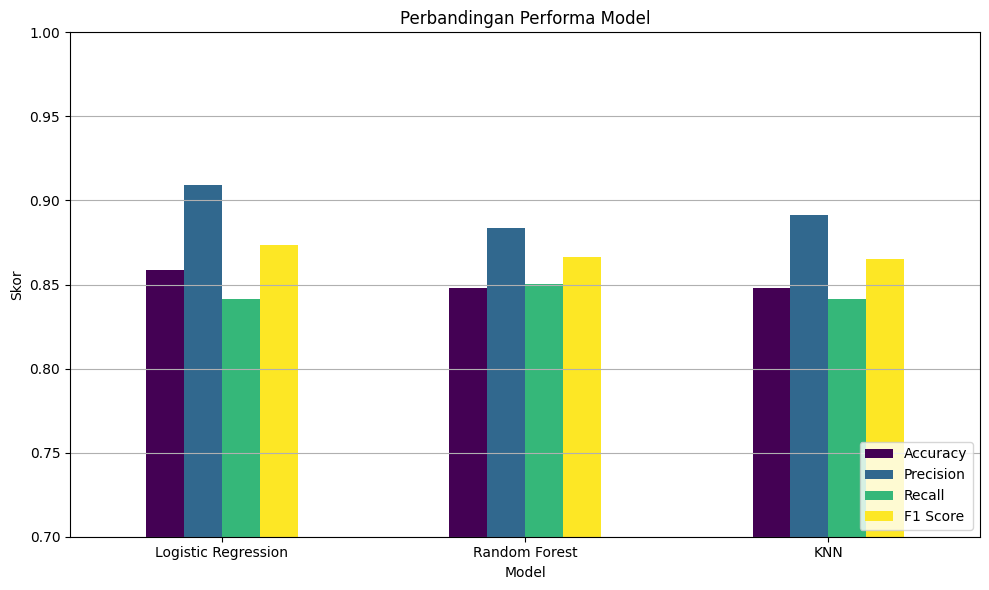

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Kumpulkan skor evaluasi
models = ['Logistic Regression', 'Random Forest', 'KNN']
accuracies = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_knn)
]
precisions = [
    precision_score(y_test, y_pred_logreg),
    precision_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_knn)
]
recalls = [
    recall_score(y_test, y_pred_logreg),
    recall_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_knn)
]
f1_scores = [
    f1_score(y_test, y_pred_logreg),
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_knn)
]

# Buat dataframe
import pandas as pd
score_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Visualisasi
score_df.set_index('Model').plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Perbandingan Performa Model')
plt.ylabel('Skor')
plt.ylim(0.7, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Sebab untuk mencari variabel yang berpengaruh pada deteksi penyakit jantung, maka disini saya menggunakan Random Forest yang bersifat toleran terhadap multikolinearitas untuk mencari feature importance. Sebelumnya, mari mencari kombinasi hyperparameter terbaik Random Forest menggunakan GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Jalankan pencarian
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.8868991646211111


**Hasil Hyperparameter Tuning**
<br>Best Parameters:
- n_estimators: 200
- min_samples_split: 2
- min_samples_leaf: 2
- max_depth: None → artinya tidak dibatasi (pohon bisa sangat dalam)
<br>Best F1 Score (CV): ~0.887 → meningkat dari sebelumnya.

In [ ]:
# Model terbaik
best_rf = grid_search.best_estimator_

# Evaluasi ulang
y_pred_best = best_rf.predict(X_test)

print("Evaluasi Model Random Forest Terbaik:")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Evaluasi Model Random Forest Terbaik:
[[65 12]
 [13 94]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



### Visualisasi Feature Importance dari Random Forest

<ipython-input-36-453bf6927755>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')


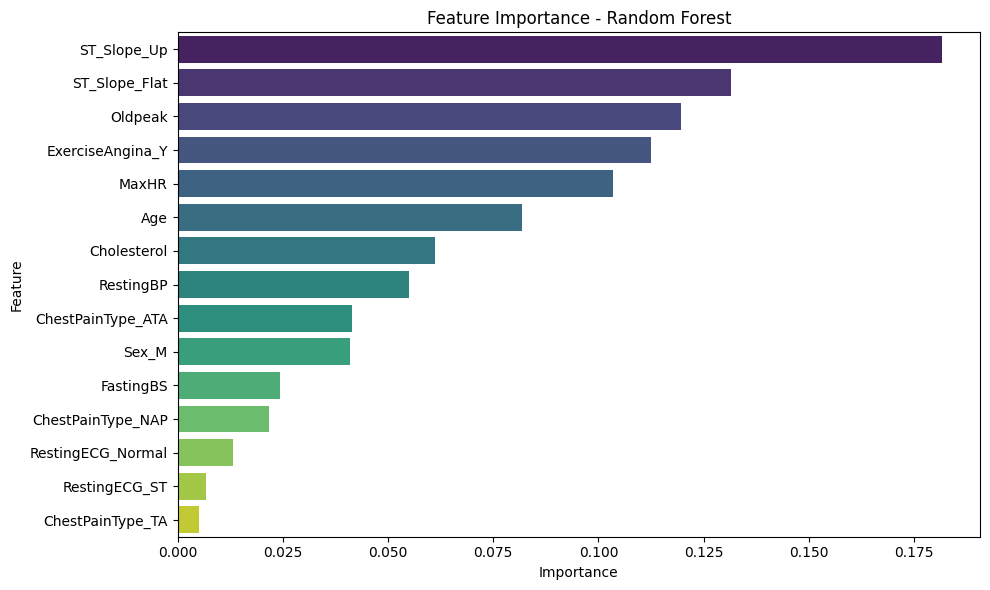

In [ ]:
# Ambil feature importances dan feature names
importances = best_rf.feature_importances_
features = X.columns

# Buat DataFrame
feat_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

**Cara interpretasi Nilai Feature Importance**
<br>Pada model Random Forest, feature importance mengukur seberapa besar kontribusi masing-masing fitur dalam membantu model membuat keputusan prediksi. Nilai feature importance menunjukkan proporsi pengaruh fitur terhadap keseluruhan performa model.

Berikut beberapa poin penting dalam interpretasi:

1. Skala Nilai Feature Importance
<br> - Nilai feature importance berada dalam rentang 0 hingga 1.
<br> - Semua nilai fitur dinormalisasi sehingga jika dijumlahkan, totalnya menjadi 1.
<br> - Semakin besar nilai feature importance, semakin besar kontribusi fitur tersebut terhadap prediksi model.

2. Makna Angka Feature Importance
<br> - Contoh: Jika sebuah fitur memiliki nilai importance sebesar 0.175, artinya fitur tersebut menyumbang 17.5% terhadap keseluruhan keputusan yang dibuat oleh model.
<br> - Fitur dengan nilai mendekati 0 memiliki pengaruh yang sangat kecil, sehingga dapat dipertimbangkan untuk dihapus dalam proses feature selection untuk menyederhanakan model atau tidak terpilih sebagau fitur yang signifikan.

3. Cara Model Menilai Pentingnya Fitur
<br>Random Forest menghitung feature importance berdasarkan berapa banyak impurity yang dikurangi oleh fitur tersebut di seluruh decision tree dalam hutan.

**Insights**
<br>Berikut adalah fitur-fitur yang paling mempengaruhi Prediksi Penyakit Jantung:
1.	ST_Slope_Up	= Slope ST naik saat exercise (sangat berasosiasi dengan jantung sehat).
2. ST_Slope_Flat =	Slope datar (cenderung muncul pada penderita penyakit jantung).
3. Oldpeak	= Depresi segmen ST setelah exercise (makin tinggi = makin berisiko).
4. ExerciseAngina_Y	= Angina saat exercise (fitur penting dalam diagnosis klinis).
5. MaxHR	= Denyut jantung maksimal (makin tinggi = makin sehat (negatif korelasi)).

Artinya: Informasi EKG saat exercise (ST_Slope, Oldpeak, Angina) adalah sinyal yang sangat penting dalam deteksi dini penyakit jantung!

## Evaluation
Dalam proyek klasifikasi ini, tujuan utama adalah memprediksi apakah seseorang memiliki penyakit jantung atau tidak berdasarkan data klinis dan rekam medis. Untuk mengukur kinerja model, digunakan beberapa metrik evaluasi utama pada kasus klasifikasi, yaitu:

**Metrik Evaluasi yang Digunakan:**
1. Accuracy
Mengukur seberapa banyak prediksi yang benar dibandingkan dengan total prediksi. Namun, metrik ini bisa menyesatkan jika data tidak seimbang.

2. Precision
Mengukur ketepatan model dalam memprediksi kelas positif (berapa banyak yang benar-benar sakit dari yang diprediksi sakit).

3. Recall
Mengukur seberapa baik model menangkap semua kasus positif (berapa banyak dari seluruh pasien sakit yang berhasil terdeteksi oleh model).

4. F1 Score
Harmonic mean dari precision dan recall. Cocok digunakan ketika kita ingin menyeimbangkan keduanya, terutama saat ada risiko false negative atau false positive yang besar.

**Hasil Evaluasi Model**
<br>Empat model diuji dalam proyek ini:
1. Logistic Regression
<br> Accuracy: 0.86
<br> Precision: 0.91
<br> Recall: 0.84
<br> F1 Score: 0.87
2. Random Forest (default)
<br> Accuracy:0.85
<br> Precision: 0.88
<br> Recall: 0.85
<br> F1 Score:0.87
3. K-Nearest Neighbors (KNN)
<br> Accuracy:0.85
<br> Precision: 0.89
<br> Recall: 0.84
<br> F1 Score: 0.87
4. Random Forest (setelah tuning hyperparameter)
<br> Accuracy:0.86
<br> Precision: 0.89
<br> Recall: 0.88
<br> F1 Score:0.88

**Rangkuman**
1. Random Forest dengan hyperparameter tuning menghasilkan performa terbaik dengan F1 Score 0.88, mengungguli model lain.
2. Fitur-fitur paling penting dalam prediksi meliputi: ST_Slope_Up, ST_Slope_Flat, Oldpeak, dan ExerciseAngina_Y.
3. Model mampu menjaga keseimbangan antara presisi dan recall, yang sangat penting dalam deteksi penyakit jantung agar tidak banyak kasus positif yang lolos (false negative).
4. Model baseline seperti Logistic Regression juga memberikan hasil yang baik, namun masih kalah sedikit dibanding Random Forest setelah tuning.



**---Ini adalah bagian akhir laporan---**
